In [10]:
import keyboard
import time

In [71]:
lab = [[1,1,1,1,1,1,1,1,1,1,1,1,1,1],
       [1,1,1,1,1,1,1,1,1,1,1,1,1,1],
       [1,1,0,0,0,0,0,0,0,0,0,0,1,1],
       [1,1,0,1,1,1,1,1,1,0,1,1,1,1],
       [1,1,0,1,0,0,0,0,0,0,0,0,1,1],
       [1,1,0,1,0,1,1,1,1,1,1,0,1,1],
       [1,1,0,1,0,1,0,0,0,0,0,0,1,1],
       [1,1,0,0,0,1,1,0,1,1,1,0,1,1],
       [1,1,0,1,0,0,0,0,1,0,1,1,1,1],
       [1,1,0,1,1,0,1,0,0,0,0,0,1,1],
       [1,1,0,1,0,0,1,1,1,1,1,0,1,1],
       [1,1,0,0,0,1,1,0,0,0,0,3,1,1],
       [1,1,1,1,1,1,1,1,1,1,1,1,1,1],
       [1,1,1,1,1,1,1,1,1,1,1,1,1,1]]

In [12]:
def key_detect():
    while True:  # making a loop
        if keyboard.is_pressed('up arrow'):
            print('Up!')
            direction = 'up'
            break  # finishing the loop
        if keyboard.is_pressed('down arrow'):
            print('Down!')
            direction = 'down'
            break  # finishing the loop
        if keyboard.is_pressed('left arrow'):
            print('Left!')
            direction = 'left'
            break  # finishing the loop
        if keyboard.is_pressed('right arrow'):
            print('Right!')
            direction = 'right'
            break  # finishing the loop
        if keyboard.is_pressed('esc'):
            print('Exit game')
            direction = -1
            break
    return direction

In [129]:
allneighb = []
for y in range(-2,3):
    for x in range(-2,3):
        allneighb.append((x,y))

class Field:
    def __init__ (self, x, y):
        self.x = x
        self.y = y
        self.neighbours = [ (x + xoff, y + yoff) for xoff, yoff in
            ( (1, 0), (0, 1), (0, -1), (-1, 0) )
            if lab [y + yoff] [x + xoff] != 1 ]
        self.all_neighbours = [ (x + xoff, y + yoff) for xoff, yoff in
            tuple(allneighb)]
        
        if len(self.neighbours) == 1:
            self.fieldtype = 'dead end'
        if len(self.neighbours) >= 3:
            self.fieldtype = 'fork'
        if len(self.neighbours) == 2:
            neighbour1, neighbour2 = self.neighbours
            x1, y1 = neighbour1
            x2, y2 = neighbour2
            if x1 != x2 and y1 != y2:
                self.fieldtype = 'corner'
            else:
                self.fieldtype = 'straight path'
        
    def get_options(self):
        self.options = []
        for option in self.neighbours:
            xopt = option[0]
            yopt = option[1]
            if xopt > self.x and yopt == self.y:
                option = 'right'
            if xopt < self.x and yopt == self.y:
                option ='left'
            if xopt == self.x and yopt < self.y:
                option ='up'
            if xopt == self.x and yopt > self.y:
                option = 'down'
            self.options.append(option)
        return self.options

    def __repr__ (self):
        return '{}: ({})'.format ( (self.x, self.y), self.neighbours)
    
fields = {}
for y in range (14):
    for x in range (14):
        if lab [y] [x]: continue
        fields [x, y] = Field (x, y)

In [130]:
for field in fields:
    print(field,Field(field[0],field[1]).fieldtype)

(2, 2) corner
(3, 2) straight path
(4, 2) straight path
(5, 2) straight path
(6, 2) straight path
(7, 2) straight path
(8, 2) straight path
(9, 2) fork
(10, 2) straight path
(11, 2) dead end
(2, 3) straight path
(9, 3) straight path
(2, 4) straight path
(4, 4) corner
(5, 4) straight path
(6, 4) straight path
(7, 4) straight path
(8, 4) straight path
(9, 4) fork
(10, 4) straight path
(11, 4) corner
(2, 5) straight path
(4, 5) straight path
(11, 5) straight path
(2, 6) straight path
(4, 6) straight path
(6, 6) dead end
(7, 6) fork
(8, 6) straight path
(9, 6) straight path
(10, 6) straight path
(11, 6) fork
(2, 7) fork
(3, 7) straight path
(4, 7) fork
(7, 7) straight path
(11, 7) dead end
(2, 8) straight path
(4, 8) corner
(5, 8) fork
(6, 8) straight path
(7, 8) fork
(9, 8) dead end
(2, 9) straight path
(5, 9) straight path
(7, 9) corner
(8, 9) straight path
(9, 9) fork
(10, 9) straight path
(11, 9) corner
(2, 10) straight path
(4, 10) corner
(5, 10) corner
(11, 10) straight path
(2, 11) 

In [49]:
def move(position,direction):
    if direction == 'up':
        xdir = 0
        ydir = -1
    if direction == 'down':
        xdir = 0
        ydir = 1
    if direction == 'right':
        xdir = 1
        ydir = 0
    if direction == 'left':
        xdir = -1
        ydir = 0
    
    # move if possible
    possibilities = Node(position.x,position.y).neighbours
    if (position.x + xdir, position.y + ydir) in possibilities:
        position_new = Node(position.x + xdir, position.y + ydir)
        print(position)
        return position_new, position_new
    else:
        position_new = position
        return 'invalid', position_new

In [16]:
def walk_to_fork(position,direction):
    while True:
        position, position_fork = move(position,direction)
        if position == 'invalid':
            print('invalid move')
            break
        if len(position.neighbours) > 2:
            print('this is a fork')
            break
    return position_fork

In [39]:
def step_forward(position,direction):
    if direction == 'up':
        xdir = 0
        ydir = -1
    if direction == 'down':
        xdir = 0
        ydir = 1
    if direction == 'right':
        xdir = 1
        ydir = 0
    if direction == 'left':
        xdir = -1
        ydir = 0
    
    position_old = copy.deepcopy(position)
    
    if len(position.get_options()) == 1:
        print('dead end')
        return position
    if len(position.get_options()) == 2:
        for option.

In [54]:
position.get_options()

['left']

In [128]:
position = Field(11,2)
len(position.get_options())

1

In [62]:
origin = nodes[2,2]
next_fork = []
for option in origin.get_options():
    position = walk_to_fork(origin, option)
    next_fork.append((position.x,position.y))
print('from this position you can go to:', next_fork)

(2, 2): ([(3, 2), (2, 3)])
(3, 2): ([(4, 2), (2, 2)])
(4, 2): ([(5, 2), (3, 2)])
(5, 2): ([(6, 2), (4, 2)])
(6, 2): ([(7, 2), (5, 2)])
(7, 2): ([(8, 2), (6, 2)])
(8, 2): ([(9, 2), (7, 2)])
this is a fork
(2, 2): ([(3, 2), (2, 3)])
(2, 3): ([(2, 4), (2, 2)])
(2, 4): ([(2, 5), (2, 3)])
(2, 5): ([(2, 6), (2, 4)])
(2, 6): ([(2, 7), (2, 5)])
this is a fork
from this position you can go to: [(9, 2), (2, 7)]


In [60]:
origin

(9, 2): ([(10, 2), (9, 3), (8, 2)])

In [63]:
position

(2, 7): ([(3, 7), (2, 8), (2, 6)])

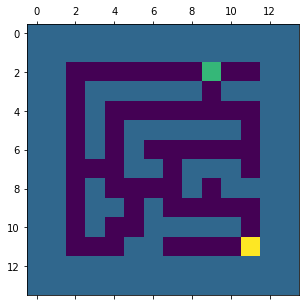

Exit game


UnboundLocalError: local variable 'xdir' referenced before assignment

In [73]:
from IPython.display import clear_output
plot_board(position,lab)
while True:
    direction = key_detect()
    position = walk_to_fork(position,direction)
    clear_output(wait=True)
    plot_board(position,lab)
    time.sleep(1)

In [65]:
def print_board(position,lab):
    for y in range (12):
        print("\n", end="")
        for x in range (12):
            if y == position.y and x == position.x:
                print('D', end="")
            elif lab[y][x] == 1:
                print('#', end="")
            elif lab[y][x] == 0:
                print(' ', end="")

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import copy
def plot_board(position,lab):
    try:
        fig.clear()
    except:
        fig = plt.figure(figsize=(10,5))

        ax1 = fig.add_subplot(1,1,1)

        # Make a 9x9 grid...
        image = copy.deepcopy(lab)
        image[position.y][position.x] = 2
        image[11][11] = 3
        ax1.matshow(image)
        plt.show()

In [291]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_board_hidden(position,lab):
    try:
        fig.clear()
    except:
        fig = plt.figure(figsize=(10,5))

        ax1 = fig.add_subplot(1,1,1)

        image = np.ones((14,14),dtype=int)
        for (x,y) in position.all_neighbours:
            image[y][x] = lab[y][x]
        image[position.y][position.x] = 2
        
        ax1.matshow(image)
        plt.show()